# Alemada County Comparitive Ethnicity Analysis: 2011 and 2019

In this short piece, I hope combine the ethinicity analysis we did individually in class last week into a single notebook.
This will use American Community Census data from 2019 and 2011. While 2019 data is in the format condusive for analysis, 2011 data was obtained by joining dataframe with geodataframe. I hope to just call the file worked one earlier, and not have to do the joining again.

I am in love with the shortcut to toggle between markdown and code esc, and then m or y. 

To start off, Calling in all libraries.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Now to import the data sets. Note that I downloaded copies worked on earlier, and will upload them to this folder. 
For this, i first went back to my work from week 3, and re-ran the entire code, and added the following line of code: alameda2011.to_file("alameda2011eth.geojson", driver='GeoJSON')
that gave me a geojseon file that I can easily download. Uploading it here saves me from having to repeate file joining and sorting. 

In [2]:
ethn2011 = gpd.read_file("alameda2011eth.geojson")
ethn2019 = gpd.read_file("alameda2019eth.geojson")

Now let us check both the files to see if they are similar. If not we still have cleaning to do!

In [3]:
ethn2011.shape

(361, 23)

In [4]:
ethn2019.shape

(361, 45)

the 2019 files needs a bit of cleaning Let us clean and match it to the 2011 file. First we check the variables in the file currently, and repeate steps from week 3 as required. 

In [5]:
list(ethn2019)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [6]:
columns_to_keep = ['geoid',
                   'name',
                   'B03002001',
                   'B03002002',
                   'B03002003',
                   'B03002004',
                   'B03002005',
                   'B03002006',
                   'B03002007',
                   'B03002008',
                   'B03002009',
                   'B03002012',
                   'geometry']

In [7]:
ethn2019 = ethn2019[columns_to_keep]

In [8]:
ethn2019.shape

(361, 13)

Now there seem to be a few mising columns. Let us check the column names in both and see how they vary.

In [9]:

list(ethn2011)

['GEOID',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'NAME',
 'Percent Total',
 'Percent Non Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Percent Hispanic',
 'geometry']

In [10]:
list(ethn2019)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

We need to rename columns, and also add percentages to the 2019 file. There must also have been some naming errors in the earlier work. Renaming 2019 columns based on their column codes.   

In [11]:
ethn2019.columns = [
 'GEOID',
    'NAME',
    'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
    'geometry']

In [12]:
list(ethn2019)

['GEOID',
 'NAME',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

Checkign datatypes. Because this was issue with my data last week.

In [13]:
dtypes = list(ethn2019)

In [14]:
for x in dtypes:
    print(x,type(ethn2019[x][0]))

GEOID <class 'str'>
NAME <class 'str'>
Total <class 'numpy.float64'>
Non Hispanic <class 'numpy.float64'>
Non Hispanic White <class 'numpy.float64'>
Non Hispanic Black <class 'numpy.float64'>
Non Hispanic American Indian and Alaska Native <class 'numpy.float64'>
Non Hispanic Asian <class 'numpy.float64'>
Non Hispanic Native Hawaiian and Other Pacific Islander <class 'numpy.float64'>
Non Hispanic Some other race <class 'numpy.float64'>
Non Hispanic Two or more races <class 'numpy.float64'>
Hispanic <class 'numpy.float64'>
geometry <class 'shapely.geometry.multipolygon.MultiPolygon'>


Cool, the datatypes are correct! Now we check the they add up

In [15]:
random_tract = ethn2019.sample()
random_tract

,GEOID,NAME,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
219,14000US06001436100,"Census Tract 4361, Alameda, CA",5977.0,3495.0,1228.0,210.0,29.0,1453.0,291.0,47.0,237.0,2482.0,"MULTIPOLYGON (((-122.13278 37.67336, -122.1323..."


In [16]:
if random_tract.iloc[0]['Total']==random_tract.iloc[0]['Non Hispanic']+random_tract.iloc[0]['Hispanic']:
    print("Values add")
else:
    print("Values do not add")

Values add


Cool, values add. Now we can add percentages. We will use a loop to quicken the work. But we first define a dataframe with only the name of the float columns to loop through. 

In [17]:
list(ethn2019)

['GEOID',
 'NAME',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [18]:
dtypes2 = ['Total', 
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic']

In [19]:
for x in dtypes2:
    ethn2019[("Percent " + x)] = ethn2019[x]/ethn2019['Total']*100
    print(x, "Completed")

Total Completed
Non Hispanic Completed
Non Hispanic White Completed
Non Hispanic Black Completed
Non Hispanic American Indian and Alaska Native Completed
Non Hispanic Asian Completed
Non Hispanic Native Hawaiian and Other Pacific Islander Completed
Non Hispanic Some other race Completed
Non Hispanic Two or more races Completed
Hispanic Completed


In [20]:
list(ethn2019)

['GEOID',
 'NAME',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry',
 'Percent Total',
 'Percent Non Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races',
 'Percent Hispanic']

That sorts our data! Now for us to try plotting a side-by-side graph!

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


Text(0.5, 1.0, 'Percent White in 2019')

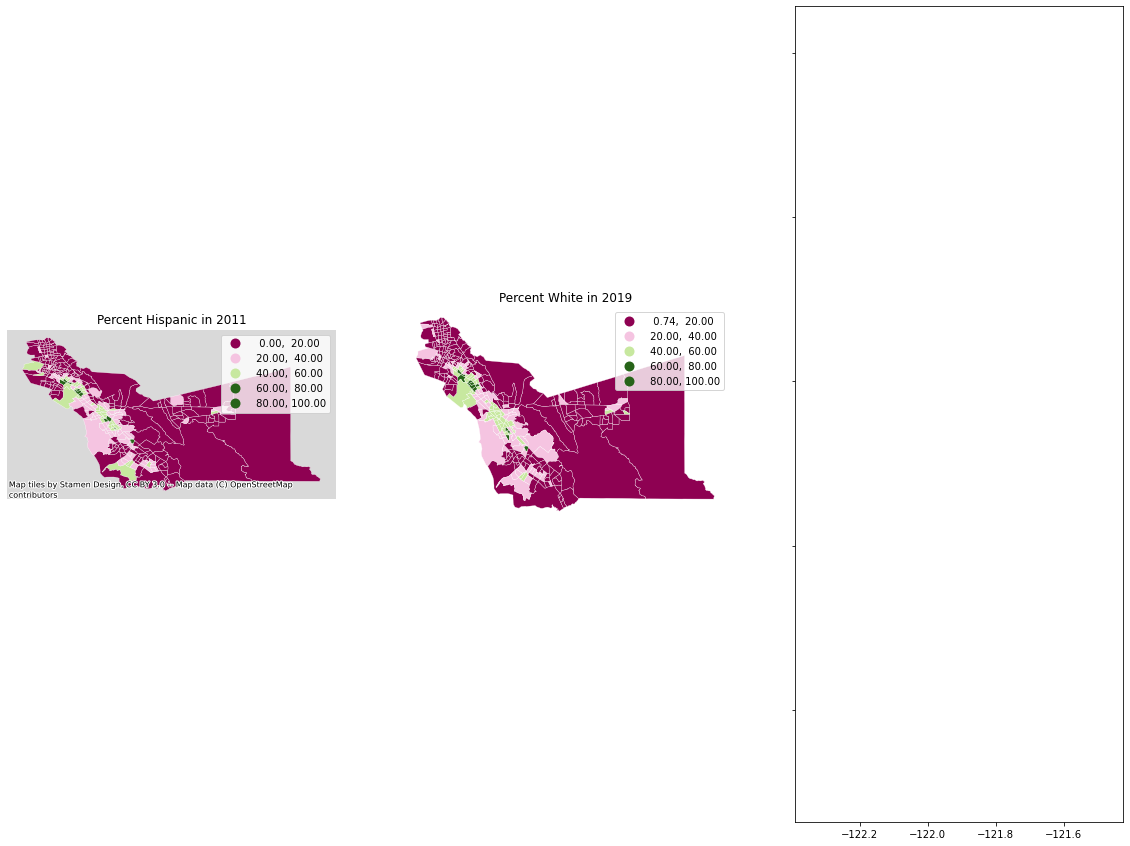

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(20, 15), sharex=True, sharey=True)
ax1, ax2, ax3 = axs
ethn2011.plot(column='Percent Hispanic', 
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax1, 
            legend=True
           )
ax1.axis("off")
ax1.set_title("Percent Hispanic in 2011")

ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite)

ethn2019.plot(column='Percent Hispanic', 
            cmap='PiYG', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.3, 
            ax=ax2, 
            legend=True
           )
ax2.axis("off")
ax2.set_title("Percent White in 2019")

Yay! That is a success. We will work on improving the graphics later. Now let us project this on a basemap. For this we first reproject the geodataframes into web mercator. 

In [22]:
# reproject to Web Mercator
e2019_webmer = ethn2019.to_crs(epsg=3857)
e2011_webmer = ethn2011.to_crs(epsg=3857)

Now subploting the projected maps

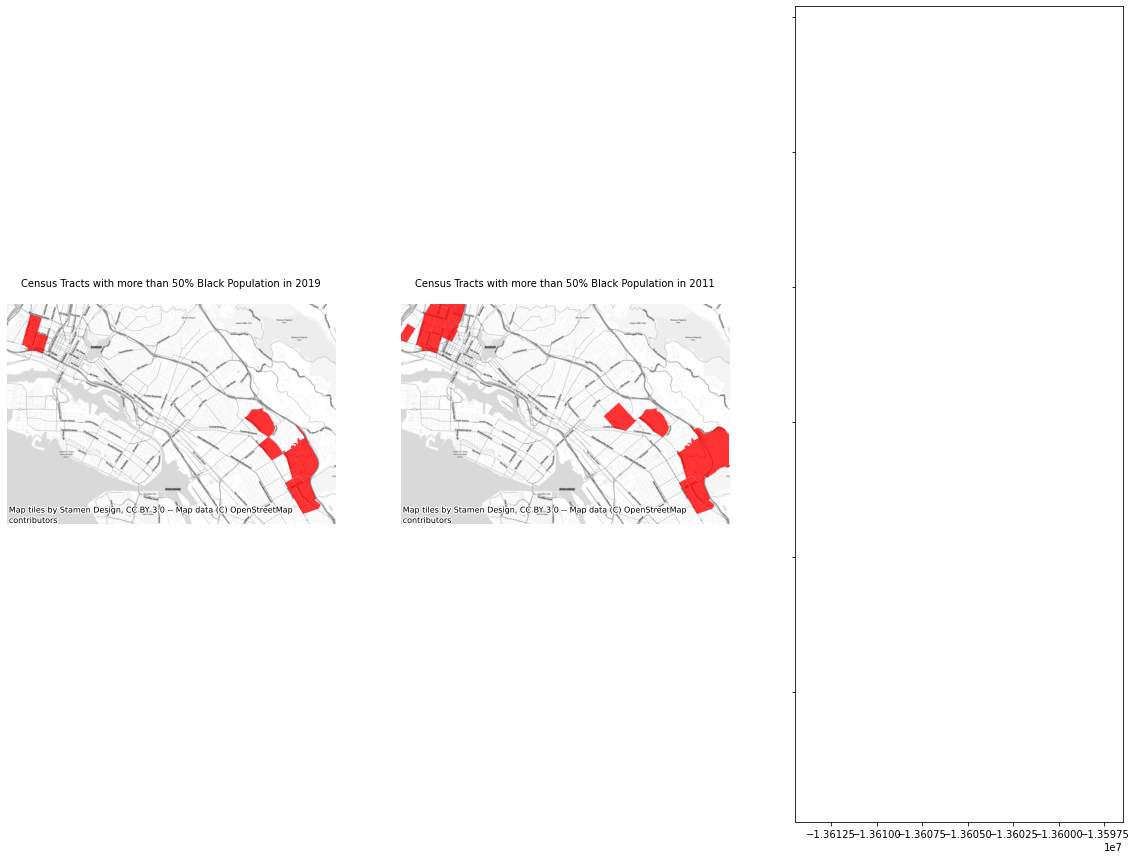

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(20, 15), sharex=True, sharey=True)
ax1, ax2, ax3 = axs
e2019_webmer[e2019_webmer['Percent Non Hispanic Black'] > 50].plot(
                                                               ax=ax1, 
                                                               color="red",
                                                               alpha=0.8
)
ax1.axis('off')
ax1.set_title('Census Tracts with more than 50% Black Population in 2019',fontsize=10,pad=18)
ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite)

e2011_webmer[e2011_webmer['Percent Non Hispanic Black'] > 50].plot(
                                                               ax=ax2, 
                                                               color="red",
                                                               alpha=0.8
)
ax2.axis('off')
ax2.set_title('Census Tracts with more than 50% Black Population in 2011',fontsize=10,pad=18)
ctx.add_basemap(ax2,source=ctx.providers.Stamen.TonerLite)

That is impressive. But what is that strange third column? We will deal with that later too. This gives us the template to re-run codes for our final project. before we go, saving the files.

In [24]:
ethn2019.to_file("ethn2019v2.geojson", driver='GeoJSON')

In [25]:
ethn2011.to_file("ethn2011v2.geojson", driver='GeoJSON')

That is it for this data set!